In [1]:
from glob import glob
import os

import cv2

from tools.functions import *

## Segmentation

In [2]:
root = "D:/instru_projects/timeseries/210821_2mgml_2500cellml_ibidi"
figs = glob(os.path.join(root,"*/*/*.tif"))
print("Total number of images: ", len(figs))

Total number of images:  44


In [208]:
#index of analae 6
indexImg = 44 #index of image
indexCell = 1

fig_path = figs[indexImg]

currentFrame = cv2.imread(fig_path)
edges, final_boundaries = faridFilter(currentFrame, filterCoef=5)


IndexError: list index out of range

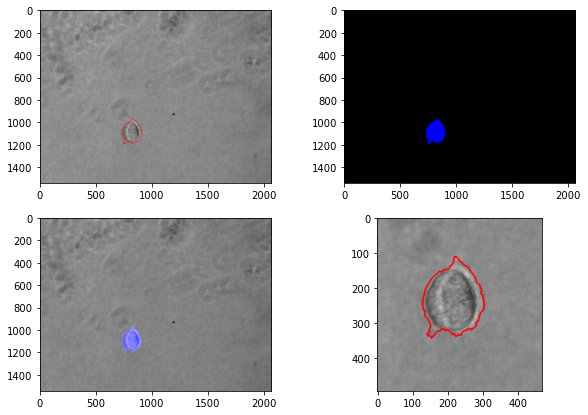

In [206]:
cutThreshold = 99.725e-2
fig, area, perimeter, largest, mask = segmentImg(currentFrame, edges, final_boundaries, cutThreshold, -1)

In [207]:
saver(root, fig_path, area, perimeter, final_boundaries, cutThreshold, indexCell, fig, mask, indexImg)

## Download data and plot the areas

In [3]:
from scipy import signal
import scipy
import seaborn as sns
import json
from glob import glob
import pandas as pd

import numpy as np
from importlib import reload
from tools.functions import *

from cmdstanpy import CmdStanModel
import arviz as az

In [4]:
## Load files 
root = "C:/Users/lehtona6/Experiments/ImageAnalysis/collagen_spheroids/230719_2mgml_2500cellsml/results"

paths_json = glob(os.path.join(root,"*/*/*.json"))
paths = glob(os.path.join(root,"*/*/*.npy"))
paths = np.concatenate((paths, paths_json))
print("Data length: ", len(paths))


Data length:  641


In [5]:
data_dict = pipe(paths, 1)

c:\Users\lehtona6\projects\Own_projects\InstruProject\incubationSeries\tools\functions.py:206: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(dataRep), len(data["shapes"])
c:\Users\lehtona6\projects\Own_projects\InstruProject\incubationSeries\tools\functions.py:208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(dataRep), len(data["shapes"])


(0.0, 800000.0)

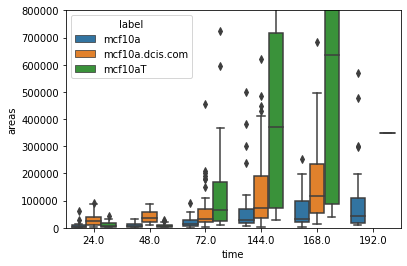

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121455_1.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121455_2.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121455_3.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121455_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
35 of 4000 (0.88%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121548_1.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121548_2.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121548_3.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121548_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
25 of 4000 (0.62%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



Processing csv files: C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121635_1.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121635_2.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121635_3.csv, C:\Users\lehtona6\AppData\Local\Temp\tmpbuh808_5\curveFit-20230807121635_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
16 of 4000 (0.40%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete.



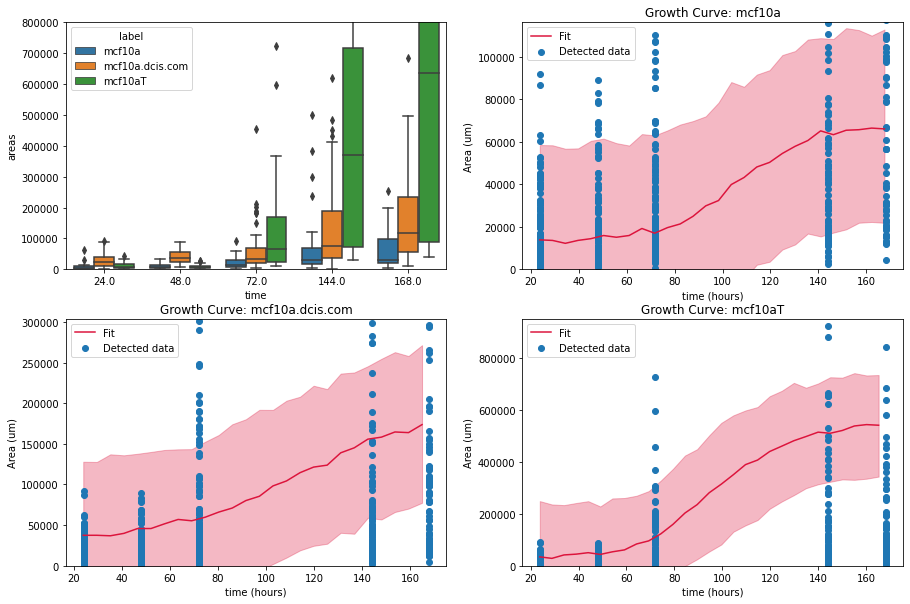

TypeError: cannot unpack non-iterable NoneType object

In [72]:
df = parse_dict(data_dict)

x, y, q_low, q_high = create_growth_fits(df)

In [71]:
def create_growth_fits(df):
    

    df = df[df["time"] != 192]
    labels = df["label"].unique()

    fig,ax = plt.subplots(2,2,figsize=(15,10))

    sns.boxplot(x= "time", y = "areas", data = df, hue ="label", ax = ax[0,0])
    ax[0,0].set_ylim([0,0.8e6])

    row = 0
    column = 1
    for count, i in enumerate(labels):

        current_df = df[df["label"] == i]

        area, scaler = norm(current_df["areas"].values)  
        time = normalize(current_df["time"])

        fit, stan_dict = fit_stan(time, area, i)

        xx, me, low, up, ax[row, column] = process_stan(fit, scaler, stan_dict, df, i, ax[row, column])

        if column == 1:
            row += 1
            column = 0
        else:
            column += 1


    plt.show()


def fit_stan(time, area, name):

    x_hat = np.arange(time.min(), time.max(), 1e-1)
    stan_dict = {"N": len(area), 
        "area": area.tolist(), 
        "time": time.tolist(),
        "N_hat": len(x_hat),
        "x_hat": x_hat.tolist()}

    with open(os.path.join('./stan/data_{}.json'.format(name)),'w') as f:
        json.dump(stan_dict,f)

    model = CmdStanModel(stan_file = "./stan/curveFit.stan")
    fit = model.sample(data = './stan/data_{}.json'.format(name),adapt_delta =0.99)
    
    print(fit.diagnose())

    return fit, stan_dict

def inv_scale(data, scaler):
    return scaler.inverse_transform(data)

def inv_scale_time(preds, org_time):

    mean = org_time.mean()
    std = org_time.std()

    return preds*std+mean

def process_stan(fit, scaler, stand_dict, df, label, ax):

    azOut = az.from_cmdstanpy(posterior=fit,
                            posterior_predictive='y_hat',
                            log_likelihood='log_lik',
                            observed_data={'area': stand_dict["area"]})
    
    #_ = az.plot_posterior(azOut)
    #plt.show()
    #_ = az.plot_trace(azOut)
    #plt.show()

    noise = np.mean(azOut.posterior_predictive["y_hat"], axis=0)

    noise = inv_scale(noise,scaler)

    me = np.percentile(noise,50,axis=0)
    low = np.percentile(noise,5,axis=0)
    up = np.percentile(noise,95,axis=0)

    xx = inv_scale_time(np.array(stand_dict["x_hat"]),df[df["label"] == label]["time"])

    ax.fill_between(xx,low,up,color='crimson',alpha=0.3)
    ax.plot(xx,me,color='crimson', label='Fit')
    ax.scatter(df["time"],df["areas"], label = "Detected data")

    ax.legend()
    ax.set_title("Growth Curve: {}".format(label))
    ax.set_xlabel("time (hours)")
    ax.set_ylabel("Area (um)")
    ax.set_ylim([0,me.max()*1.75])
    #plt.show()

    return xx, me, low, up, ax



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  warnings.warn(


In r_49 hours, total Explained Variance: 63.47745101802978%


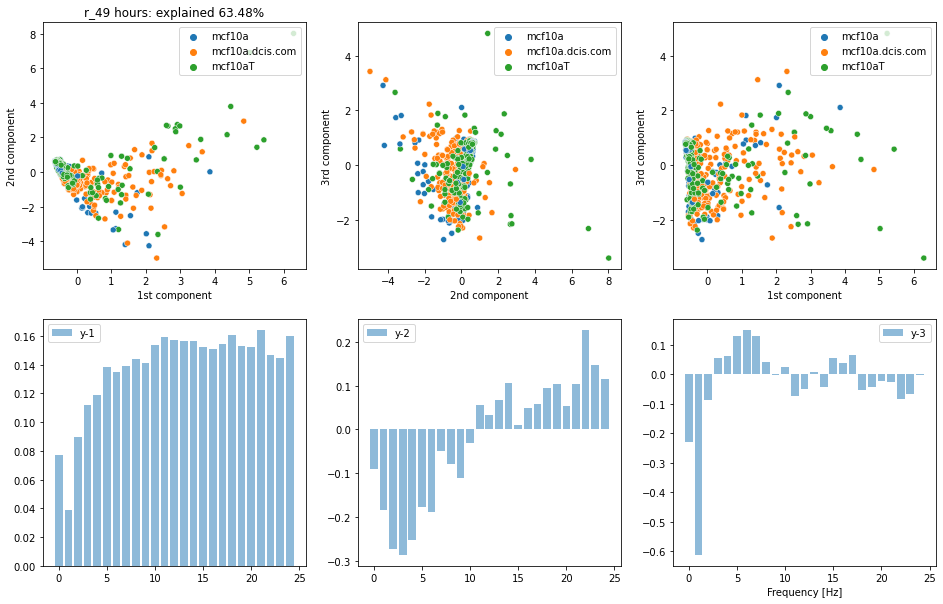

In [5]:
pca, df, comps = PCA_and_viz(data_dict, "R","label") #label #time